In [0]:
!pip3 install https://github.com/OlafenwaMoses/ImageAI/releases/download/2.0.2/imageai-2.0.2-py3-none-any.whl

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
ls

 57.jpg         logo.png
 a.jpg         'Screenshot (179).png'
 detect.ipynb   Tesseract-OCR/
 i1.jpg         tesseract-ocr-w64-setup-v4.1.0.20190314.exe
 ID/            train_custom.ipynb


In [0]:
cd ..

/


In [0]:
cd gdrive/My Drive/Colab Notebooks

/gdrive/My Drive/Colab Notebooks


In [0]:
from imageai.Prediction.Custom import ModelTraining

from imageai.Detection import ObjectDetection
import os

execution_path = os.getcwd()

detector = ObjectDetection()
detector.setModelTypeAsResNet()
detector.setModelPath( os.path.join(execution_path , "ID/models/model_ex-003_acc-0.333333.h5"))
detector.loadModel()


detections, objects_path = detector.detectObjectsFromImage(input_image=os.path.join(execution_path , "a.jpg"), output_image_path=os.path.join(execution_path , "image3new.jpg"), minimum_percentage_probability=30,  extract_detected_objects=True)


for eachObject, eachObjectPath in zip(detections, objects_path):
  print(eachObject["name"] , " : " , eachObject["percentage_probability"], " : ", eachObject["box_points"] )
  print("Object's image saved in " + eachObjectPath)
  print("--------------------------------")

AttributeError: ignored

In [0]:
from imageai.Prediction.Custom import CustomImagePrediction
import os
execution_path = os.getcwd()


prediction = CustomImagePrediction()
prediction.setModelTypeAsResNet()
prediction.setModelPath(os.path.join(execution_path, "ID/models/model_ex-151_acc-1.000000.h5"))
prediction.setJsonPath(os.path.join(execution_path, "ID/json/model_class.json"))
prediction.loadModel(num_objects=3)


predictions, probabilities = prediction.predictImage(os.path.join(execution_path, "a.jpg"), result_count=5)


for eachPrediction, eachProbability in zip(predictions, probabilities):
  print(eachPrediction + " : " + eachProbability)
  

Instructions for updating:
Colocations handled automatically by placer.
Aadhaar : 99.95664954185486
Driving_Licence : 0.040517625166103244
Voter_ID : 0.0028384045435814187


In [0]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
from google.colab.patches import cv2_imshow


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5500  100  5500    0     0  93220      0 --:--:-- --:--:-- --:--:-- 93220


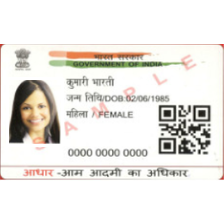

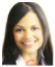

In [0]:
# password : 45CF2pu6ef
faceCascade = cv2.CascadeClassifier("ID/Cascade/haarcascade_frontalface_default.xml")
frame = cv2.imread("a.jpg", cv2.IMREAD_UNCHANGED)

    # Convert to grayscale
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect features specified in Haar Cascade
faces = faceCascade.detectMultiScale(
     gray,
     scaleFactor=1.1,
     minNeighbors=5,
     minSize=(35, 35)
)

    # Draw a rectangle around recognized faces 
for (x, y, w, h) in faces:
    width = w * 15 / 100
    height = h * 30 / 100
    width = int(width)
    height = int(height)
    cv2.rectangle(frame, (x - width, y - height), (x + w + width, y + h + height), (255, 0, 0), 2)
    photo = frame[y - height : y + h + height,x - width : x + w + width]
    # Display the resulting frame
cv2_imshow(frame)
cv2_imshow(photo)
cv2.waitKey(0)

cv2.destroyAllWindows()

In [0]:
!pip install pytesseract

    100% |████████████████████████████████| 174kB 11.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/d5/90/56/ab7b652592da86821293f7cadc1c554aa376a0d57ce414d0a0
Successfully built pytesseract


In [0]:
#from PIL import Image
import cv2

import pytesseract
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# link to download pytesseract.exe
# http://www.pythonware.com/products/pil/
# https://digi.bib.uni-mannheim.de/tesseract/tesseract-ocr-w64-setup-v4.1.0.20190314.exe

img = cv2.imread("i1.jpg")
#img = Image.open("i1.jpg")

text = pytesseract.image_to_string(img)
print(text)

x = text.split()
print(x)
name = ""
gender = ""
date = ""
flag=0
No = ""
for i in range(len(x)):
    if(x[i] == "male" or x[i] == "Male" or x[i] == "female" or x[i] == "Female"):
        gender = x[i]
        continue
    if(len(x[i]) == 10):
        if(x[i][4] == "-" and x[i][7] == "-"):
            date = x[i]
        continue
    if(x[i] == "Year" and x[i+2] == "Birth"):
        date = x[i+4]
        continue
    if(len(x) > (i+2)):
        if (len(x[i]) == 4  and len(x[i+1]) == 4 and len(x[i+2]) == 4 ):
            No = x[i]
            continue
    if(len(x)>(i+1)):
        if (len(x[i-1]) == 4 and len(x[i]) == 4 and len(x[i + 1]) == 4):
            No = No + ' ' + x[i]
            continue
    if (len(x[i]) == 4 and len(x[i - 1]) == 4 and len(x[i - 2]) == 4):
        No = No + ' ' + x[i]
        continue
    elif(flag<=2):
        name = name + ' ' + x[i]
        flag=flag+1

print("Gender : "+gender+"\nDate : " +date+ " \nname : "+name+ " \nNo : "+No)

TesseractNotFoundError: ignored